In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.pyplot import plot
import scienceplots
plt.style.use('science')

import numpy as np
from scipy import signal
from scipy.signal import butter,filtfilt
T = 20         # Sample Period
fs = 495.0       # sample rate, Hz
cutoff = 3      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [2]:
def import_data(filename):
    df= pd.read_csv(filename, header = None)
    df.rename(columns={0: 'time_ros', 1: 'time',  2:'witt', 3:'hall', 4:'poss'}, inplace=True)
    df = df.drop(df[df.poss > 4.3].index)
    df['witt'] = abs(df['witt'])
    df['poss'] = abs(df['poss']-max(df['poss']))
    df = df.drop(df[df.time == 0].index)
    print(df)
    return df

In [3]:
def hall_plots(df):
    hall = abs(df['hall'])
    witt= abs(df['witt'])
    poss = abs(df['poss'])
    time = list(range(0,len(df['time'])))
    
    figure, axis = plt.subplots(2,2, figsize=(9, 9))
    
    axis[0][0].plot(hall,witt)
    axis[0][0].set_title("Hall vs Wittenstein")
    axis[0][0].set_xlabel('Hall', fontsize=10)
    axis[0][0].set_ylabel('Wittenstein', fontsize=10)
    
    axis[0][1].plot(time,hall)
    axis[0][1].set_title("Time vs Hall")
    axis[0][1].set_xlabel('Time', fontsize=10)
    axis[0][1].set_ylabel('Hall', fontsize=10)
    
    axis[1][0].plot(poss,hall)
    axis[1][0].set_title("Position vs Hall")
    axis[1][0].set_xlabel('Position', fontsize=10)
    axis[1][0].set_ylabel('Hall', fontsize=10)
     
    axis[1][1].plot(time,poss)
    axis[1][1].set_title("Time vs Position")
    axis[1][1].set_xlabel('Time', fontsize=10)
    axis[1][1].set_ylabel('Position', fontsize=10)

In [4]:
def filters(data, cutoff, fs, order):
    hall = data['hall']
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    pass_filter = filtfilt(b, a, hall)
    sg_filter = signal.savgol_filter(pass_filter,
                           550, # window size used for filtering
                           2), # order of fitted polynomial
    return pass_filter,sg_filter

In [5]:
ls

blue_10_18:54_data.csv  Graphs/                 Hall_Calibration.ipynb
blue_15_19:25_data.csv  green_30_9:19_data.csv  yellow_10_18:32_data.csv
blue_17_23:41_data.csv  green_30_9:30_data.csv  yellow_13_23:22_data.csv
Calibration.ipynb       green_30_9:31_data.csv  yellow_17_23:16_data.csv
Calibration.pdf         green_30_9:33_data.csv  yellow_17_23:4_data.csv


#### Yellow Hall

In [6]:
yellow_df = import_data('green_30_9:33_data.csv')

           time_ros   time      witt      hall    poss
17000  1.680147e+09  17000  0.325087  0.259995  0.0000
17001  1.680147e+09  17001  0.325087  0.199997  0.0001
17002  1.680147e+09  17002  0.421796  0.199997  0.0002
17003  1.680147e+09  17003  0.317856  0.199997  0.0003
17004  1.680147e+09  17004  0.382883  0.119995  0.0004
...             ...    ...       ...       ...     ...
79995  1.680147e+09  29995  0.345649  0.699997  0.3005
79996  1.680147e+09  29996  0.360285  0.639999  0.3004
79997  1.680147e+09  29997  0.360285  0.639999  0.3003
79998  1.680147e+09  29998  0.350102  0.639999  0.3002
79999  1.680147e+09  29999  0.334305  0.619995  0.3001

[62999 rows x 5 columns]


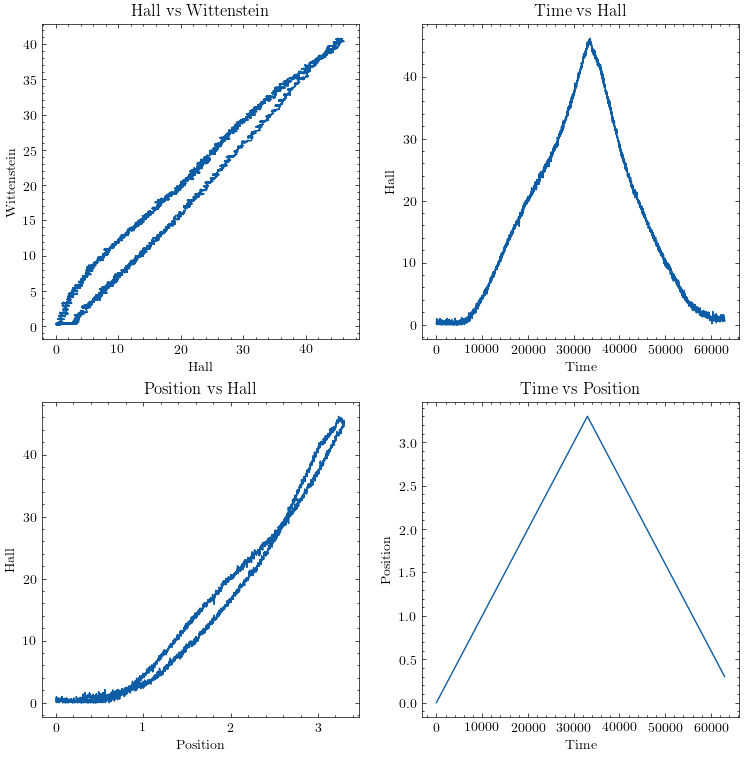

In [7]:
hall_plots(yellow_df)

In [22]:
yellow_filter, yellSg_filter  = filters(yellow_df, cutoff, fs, order)

In [23]:
yellow_df['hall'] = yellSg_filter[0]

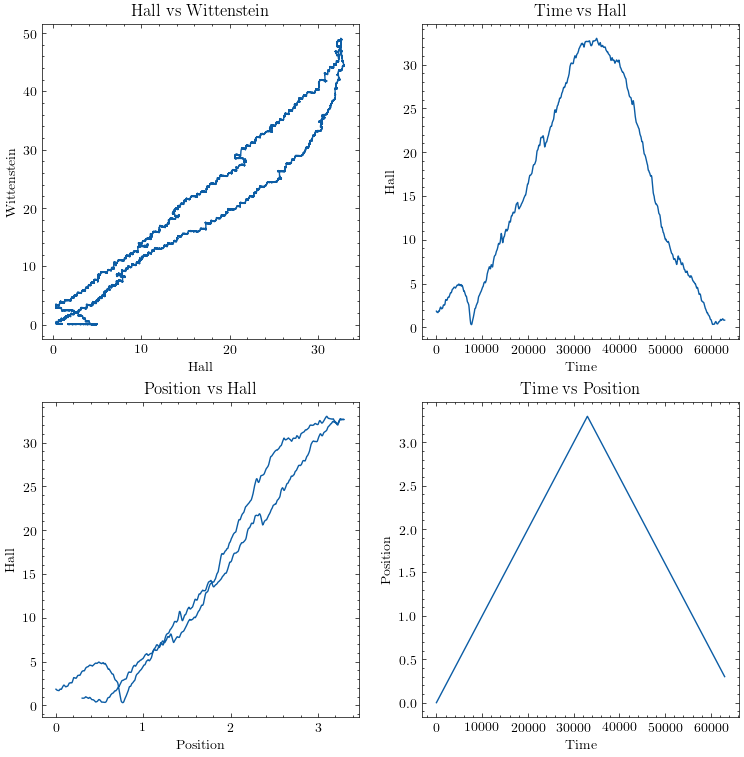

In [24]:
hall_plots(yellow_df)

In [25]:
### polynomial fit
xY = yellow_df['hall']
yY = abs(yellow_df['witt'])

polyY = np.polyfit(xY, yY, deg = 3)
polyY

array([ 9.43420865e-04, -4.06505811e-02,  1.72892976e+00, -2.21910355e+00])

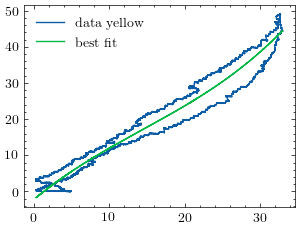

In [26]:
plt.plot(xY, yY, label = "data yellow")
plt.plot(xY, np.polyval(polyY, xY), label = "best fit")
plt.legend()
plt.show()


In [27]:
### during pressing
pressXY, pressYY = xY[:50000], yY[:50000] 
pressPolyY = np.polyfit(pressXY, pressYY, deg = 3)
pressPolyY

array([ 1.53778247e-03, -7.36579958e-02,  2.23257705e+00, -3.84038538e+00])

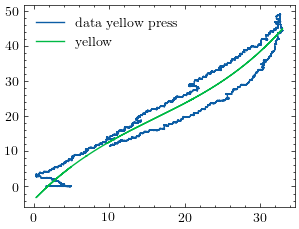

In [28]:
plt.plot(pressXY, pressYY, label = "data yellow press")
plt.plot(pressXY, np.polyval(pressPolyY, pressXY), label = "yellow")
plt.legend()
plt.show()

In [29]:
### during unpressing
unpressXY, unpressYY = xY[50000:], yY[50000:] 
unpressPolyY = np.polyfit(unpressXY, unpressYY, deg = 3)
unpressPolyY

array([-0.0035796 ,  0.10428943,  0.4693061 , -0.00976645])

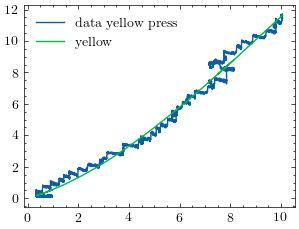

In [30]:
plt.plot(unpressXY, unpressYY, label = "data yellow press")
plt.plot(unpressXY, np.polyval(unpressPolyY, unpressXY), label = "yellow")
plt.legend()
plt.show()

#### Blue sensor

In [8]:
ls

blue_10_18:54_data.csv  green_30_9:30_data.csv  red_30_9:58_data.csv
blue_15_19:25_data.csv  green_30_9:31_data.csv  red_30_9:59_data.csv
blue_17_23:41_data.csv  green_30_9:33_data.csv  yellow_10_18:32_data.csv
Calibration.ipynb       Hall_Calibration.ipynb  yellow_13_23:22_data.csv
Calibration.pdf         red_30_10:1_data.csv    yellow_17_23:16_data.csv
Graphs/                 red_30_10:2_data.csv    yellow_17_23:4_data.csv
green_30_9:19_data.csv  red_30_9:57_data.csv


           time_ros   time      witt      hall    poss
17000  1.680149e+09  17000  0.041618  1.000000  0.0000
17001  1.680149e+09  17001  0.083630  0.979980  0.0001
17002  1.680149e+09  17002  0.053893  0.960022  0.0002
17003  1.680149e+09  17003  0.097165  0.859985  0.0003
17004  1.680149e+09  17004  0.013730  0.840027  0.0004
...             ...    ...       ...       ...     ...
79995  1.680149e+09  29995  0.009175  5.539980  0.3005
79996  1.680149e+09  29996  0.027156  5.560000  0.3004
79997  1.680149e+09  29997  0.031612  5.580020  0.3003
79998  1.680149e+09  29998  0.023034  5.739990  0.3002
79999  1.680149e+09  29999  0.017493  5.760010  0.3001

[62999 rows x 5 columns]


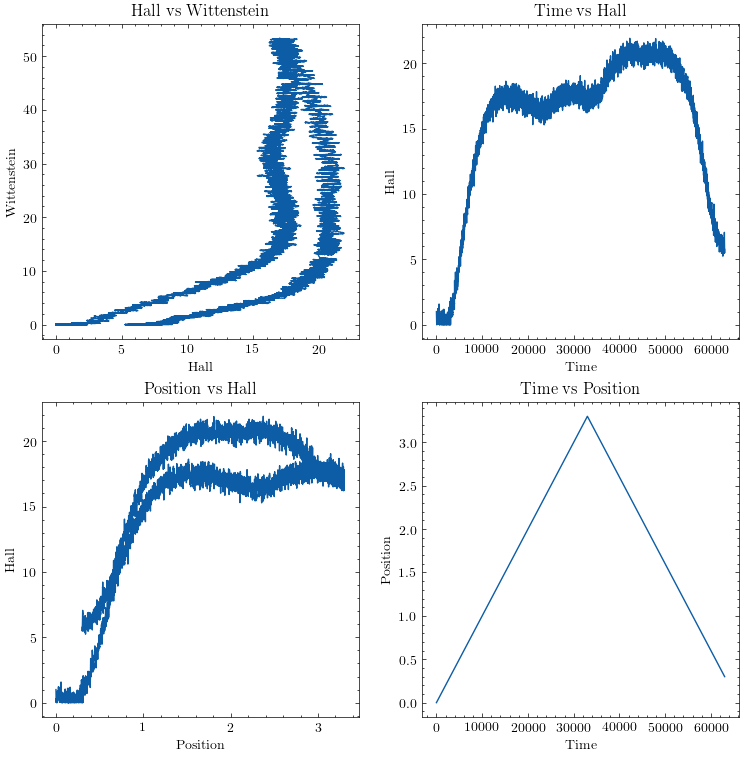

In [10]:
# blue_df = import_data('blue_10_18:54_data.csv')
# blue_df = import_data('blue_15_19:25_data.csv')
blue_df = import_data('red_30_10:2_data.csv')

hall_plots(blue_df)

In [45]:
blue_filter, blueSG_filter  = filters(blue_df, cutoff, fs, order)

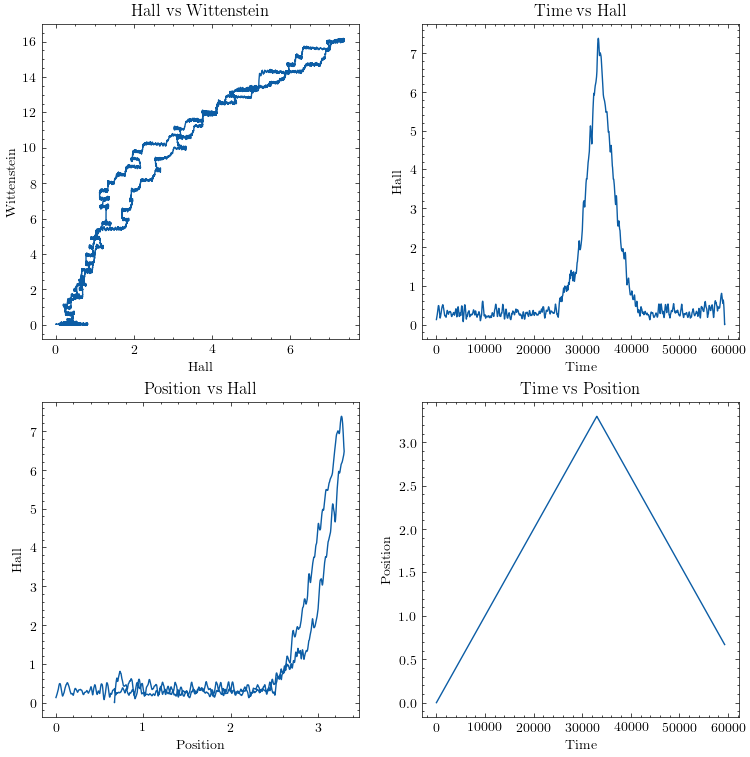

In [46]:
blue_df['hall'] = blueSG_filter[0]
hall_plots(blue_df)

In [47]:
### polynomial fit
xB = blue_df['hall']
yB = abs(blue_df['witt'])

polyB = np.polyfit(xB, yB, deg = 3)
polyB

array([ 0.0635668 , -1.03937553,  6.66023164, -1.85508363])

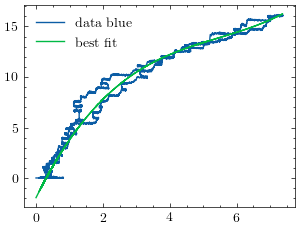

In [48]:
plt.plot(xB, yB, label = "data blue")
plt.plot(xB, np.polyval(polyB, xB), label = "best fit")
plt.legend()
plt.show()

In [49]:
### during pressing
pressXB, pressYB = xB[:50000], yB[:50000] 
pressPolyB = np.polyfit(pressXB, pressYB, deg = 3)
pressPolyB

array([ 0.07624223, -1.17284263,  6.99057377, -1.86468621])

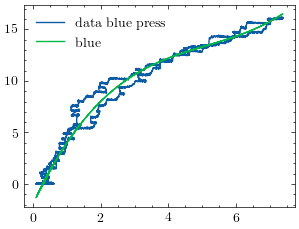

In [50]:
plt.plot(pressXB, pressYB, label = "data blue press")
plt.plot(pressXB, np.polyval(pressPolyB, pressXB), label = "blue")
plt.legend()
plt.show()

In [51]:
### during unpressing
unpressXB, unpressYB = xB[50000:], yB[50000:] 
unpressPolyB = np.polyfit(unpressXB, unpressYB, deg = 3)
unpressPolyB

array([ 0.21237539, -0.28383011,  0.08220344,  0.03538414])

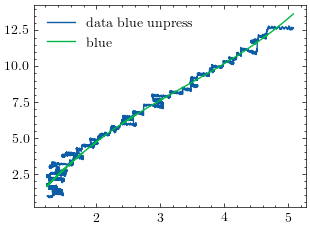

In [39]:
plt.plot(unpressXB, unpressYB, label = "data blue unpress")
plt.plot(unpressXB, np.polyval(unpressPolyB, unpressXB), label = "blue")
plt.legend()
plt.show()

## Plots

In [52]:
def new_plots(df, poly, color = 'yellow'):
    hall = abs(df['hall'])
    
    time = list(range(0,len(df['time'])))
    max_val = df['witt'].idxmax()
    print(max_val)
    leng = int(len(df)//2)+2000
    hall_press = hall[:leng]
    hall_unpress = hall[leng:]
    witt_press = df['witt'][:leng]
    witt_unpress = df['witt'][leng:]
    poss_press = df['poss'][:leng]
    poss_unpress = df['poss'][leng:]
    time_press = time[:leng]
    time_unpress = time[leng:]
    
    with plt.style.context(['science', 'ieee']):
        plt.figure(figsize=(10,8))
        plt.scatter(hall_press, witt_press, color = 'black',label = "During Press", s = 2)
        plt.scatter(hall_unpress, witt_unpress, color = color, label = "During Unpress", s = 2) 
        plt.plot(hall, np.polyval(poly, hall), 'r--',label = "Best Fit Line", linewidth = 2)
        plt.title(f"Correlation of hall effect sensor's output to force sensor's output ({color})")
        plt.xlabel("Hall effect sensor output")
        plt.ylabel("Force value from force sensor(N)")
        plt.legend()
        plt.show()
        ticks = ['',0,10,20,30,40,50,60,'']
        
        figure, axis = plt.subplots(1,2, figsize=(10, 8))

        axis[0].plot(time_press, hall_press, 'k-',label = "During Press", linewidth = 3)
        axis[0].legend(loc='upper left')
        axis[0].plot(time_unpress, hall_unpress, color = color ,label = "During Unpress", linewidth = 3)
        axis[0].legend(loc='upper left')
        axis[0].set_xticklabels(ticks)
        axis[0].set_xlabel('Time(s)', fontsize=10)        
        axis[0].set_ylabel('Hall effect sensor output', fontsize=10)
        axis[0].set_title(f"Time vs Hall effect sensor output ({color})")
        axis[0].set_xticks(axis[0].get_xticks())
        axis[0].set_xticklabels(ticks)

        
        axis[1].plot(time_press, witt_press, 'k-',label = "During Press", linewidth = 3)
        axis[1].legend(loc='upper left')
        axis[1].plot(time_unpress, witt_unpress, color = color ,label = "During Unpress", linewidth = 3)
        axis[1].legend(loc='upper left')
        axis[1].set_xlabel('Time(s)', fontsize=10)
        axis[1].set_ylabel('Force value from force sensor(N)', fontsize=10)
        axis[1].set_title("Time vs Force sensor output")
        axis[1].set_xticks(axis[0].get_xticks())
        axis[1].set_xticklabels(ticks)

        figure, axis = plt.subplots(1,2, figsize=(10, 8))

        axis[0].plot(poss_press, hall_press, 'k-',label = "During Press", linewidth = 3)
        axis[0].legend(loc='upper left')
        axis[0].plot(poss_unpress, hall_unpress, color = color ,label = "During Unpress", linewidth = 3)
        axis[0].legend(loc='upper left')
        axis[0].set_xlabel('Deformation(mm)', fontsize=10)
        
        axis[0].set_ylabel('Hall effect sensor output', fontsize=10)
        axis[0].set_title(f"Time vs Hall effect sensor output ({color})")

        axis[1].plot(poss_press, witt_press, 'k-',label = "During Press", linewidth = 3)
        axis[1].legend(loc='upper left')
        axis[1].plot(poss_unpress, witt_unpress, color = color ,label = "During Unpress", linewidth = 3)
        axis[1].legend(loc='upper left')
        axis[1].set_xlabel('Deformation(mm)', fontsize=10)
        axis[1].set_ylabel('Force value from force sensor(N)', fontsize=10)
        axis[1].set_title("Deformation vs Force sensor output")
        
#         plt.plot(time_press, hall_press, label = "During Press", linewidth = 3)
#         plt.plot(time_unpress, hall_unpress, label = "During Unpress", linewidth = 3) 
#         plt.title("Sensor ouput vs time")
#         plt.legend()
#         plt.show()
    

50250


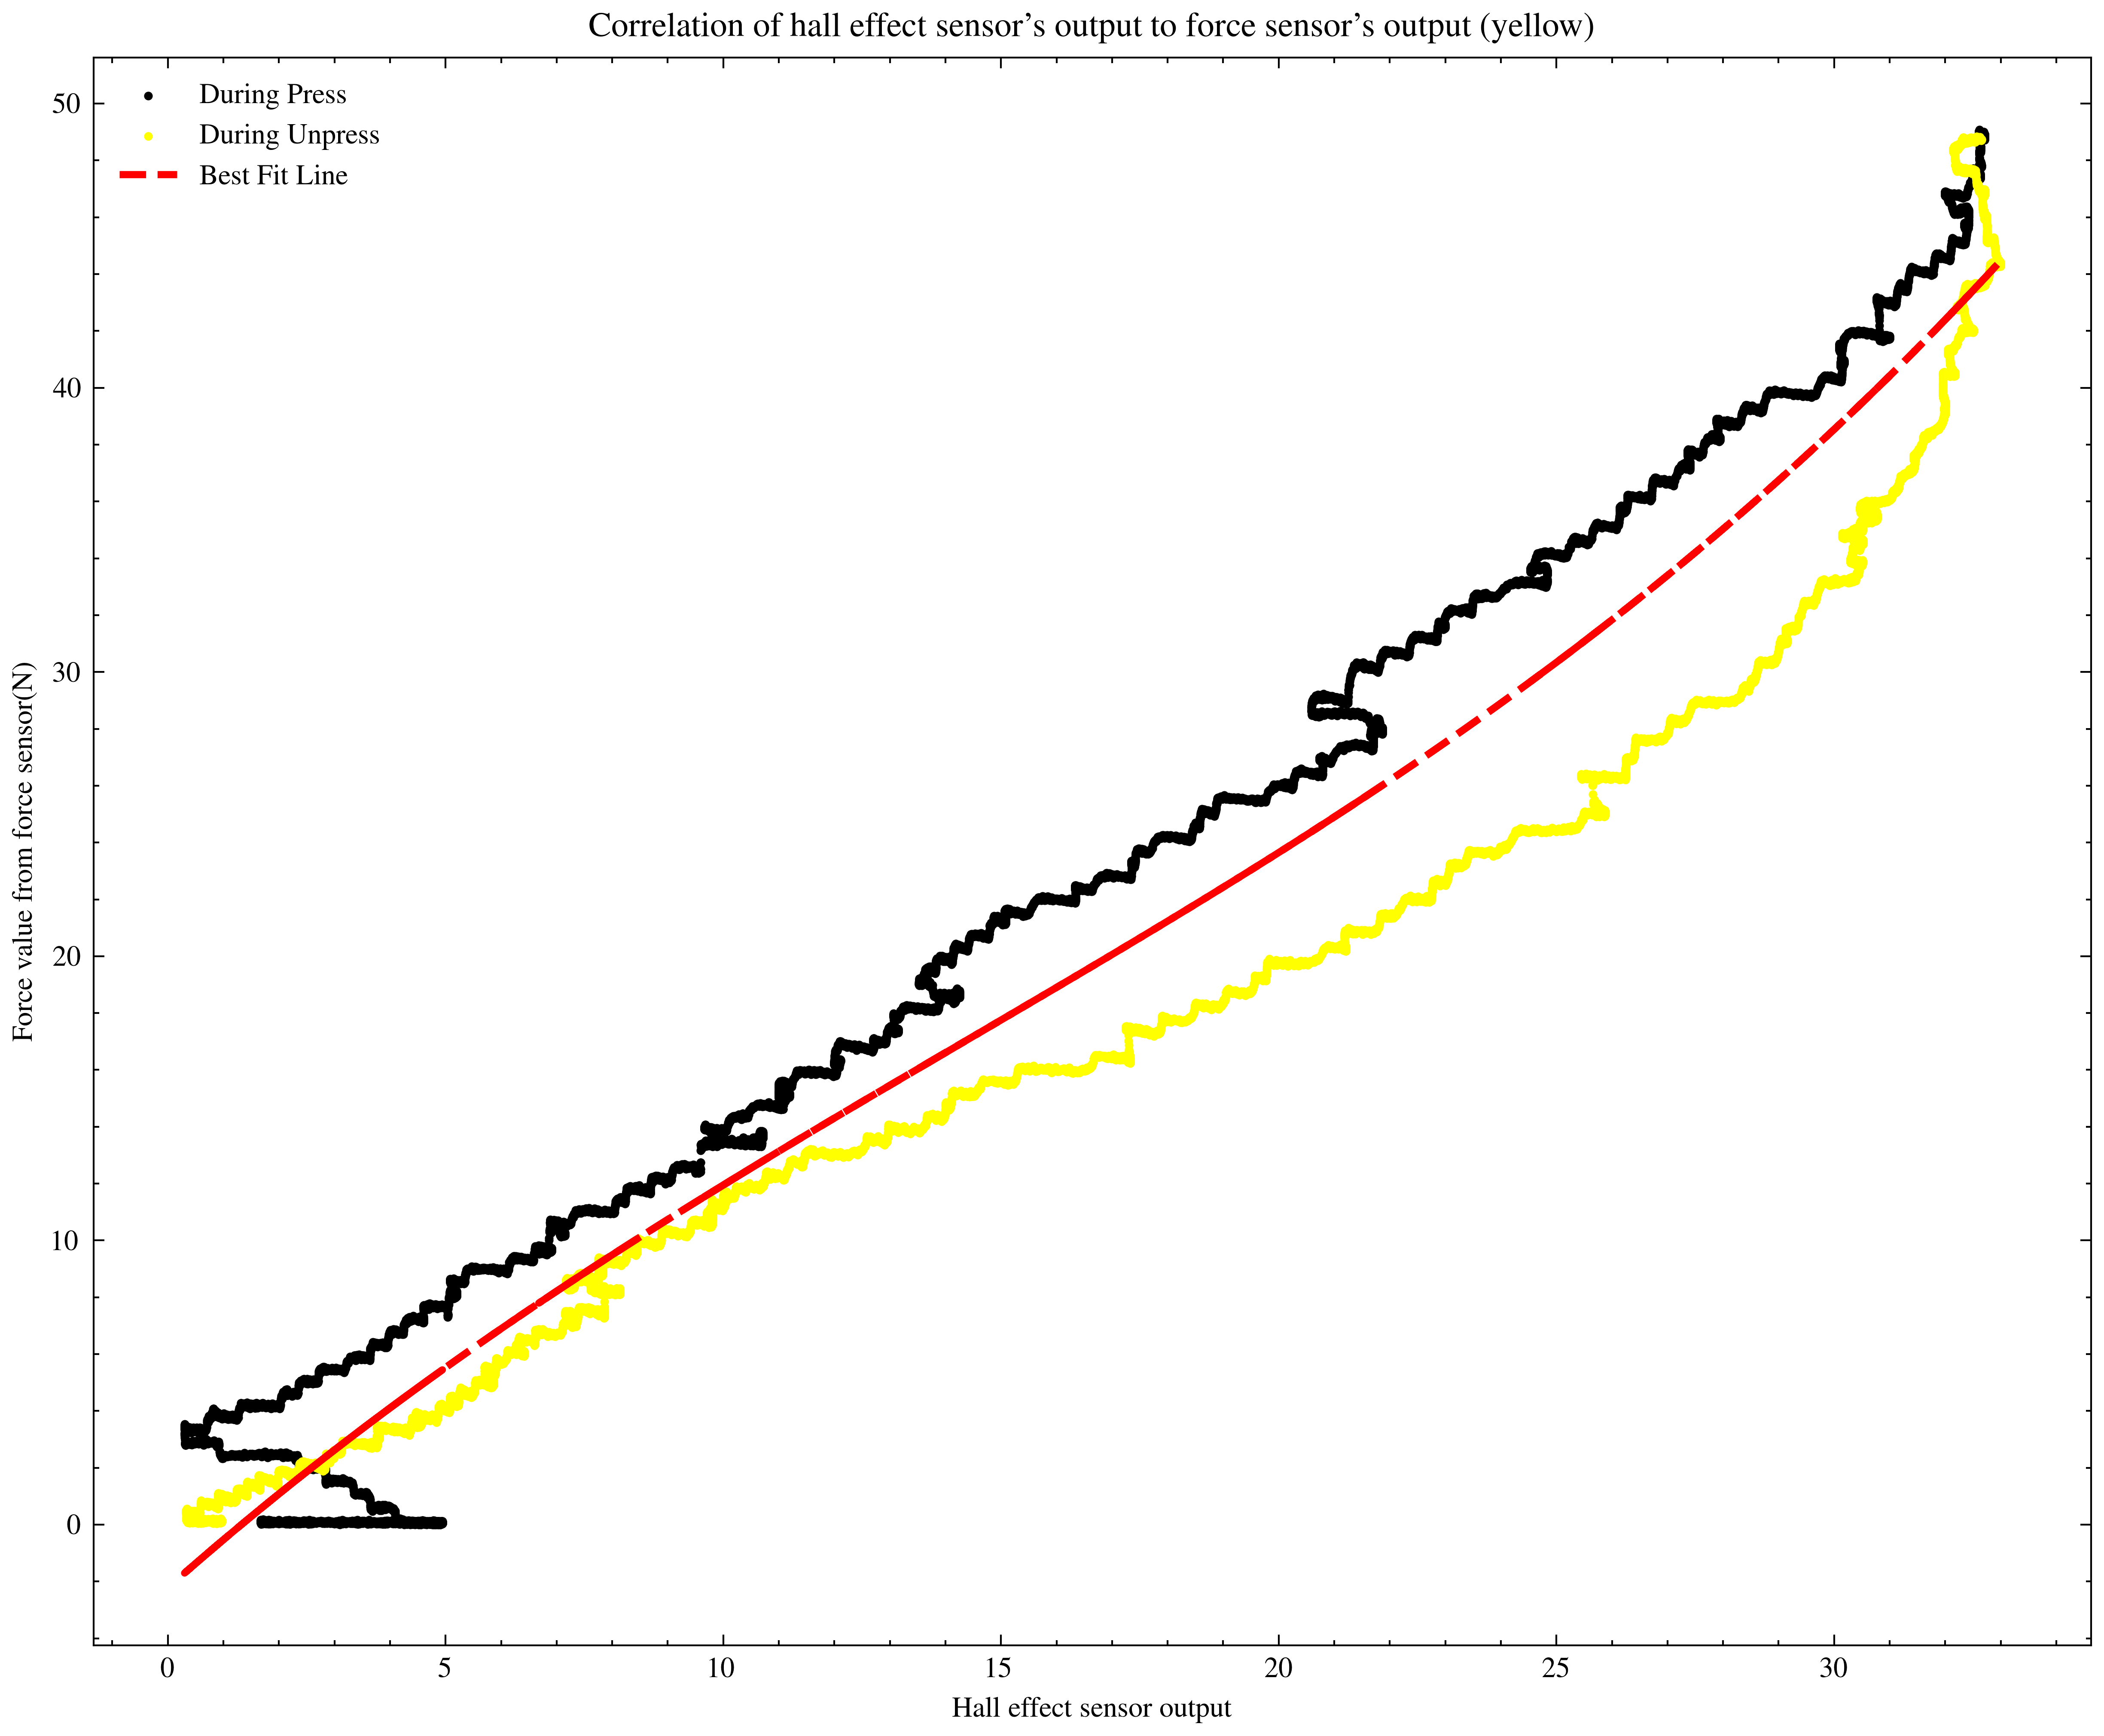

/tmp/ipykernel_22694/2833709416.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(ticks)


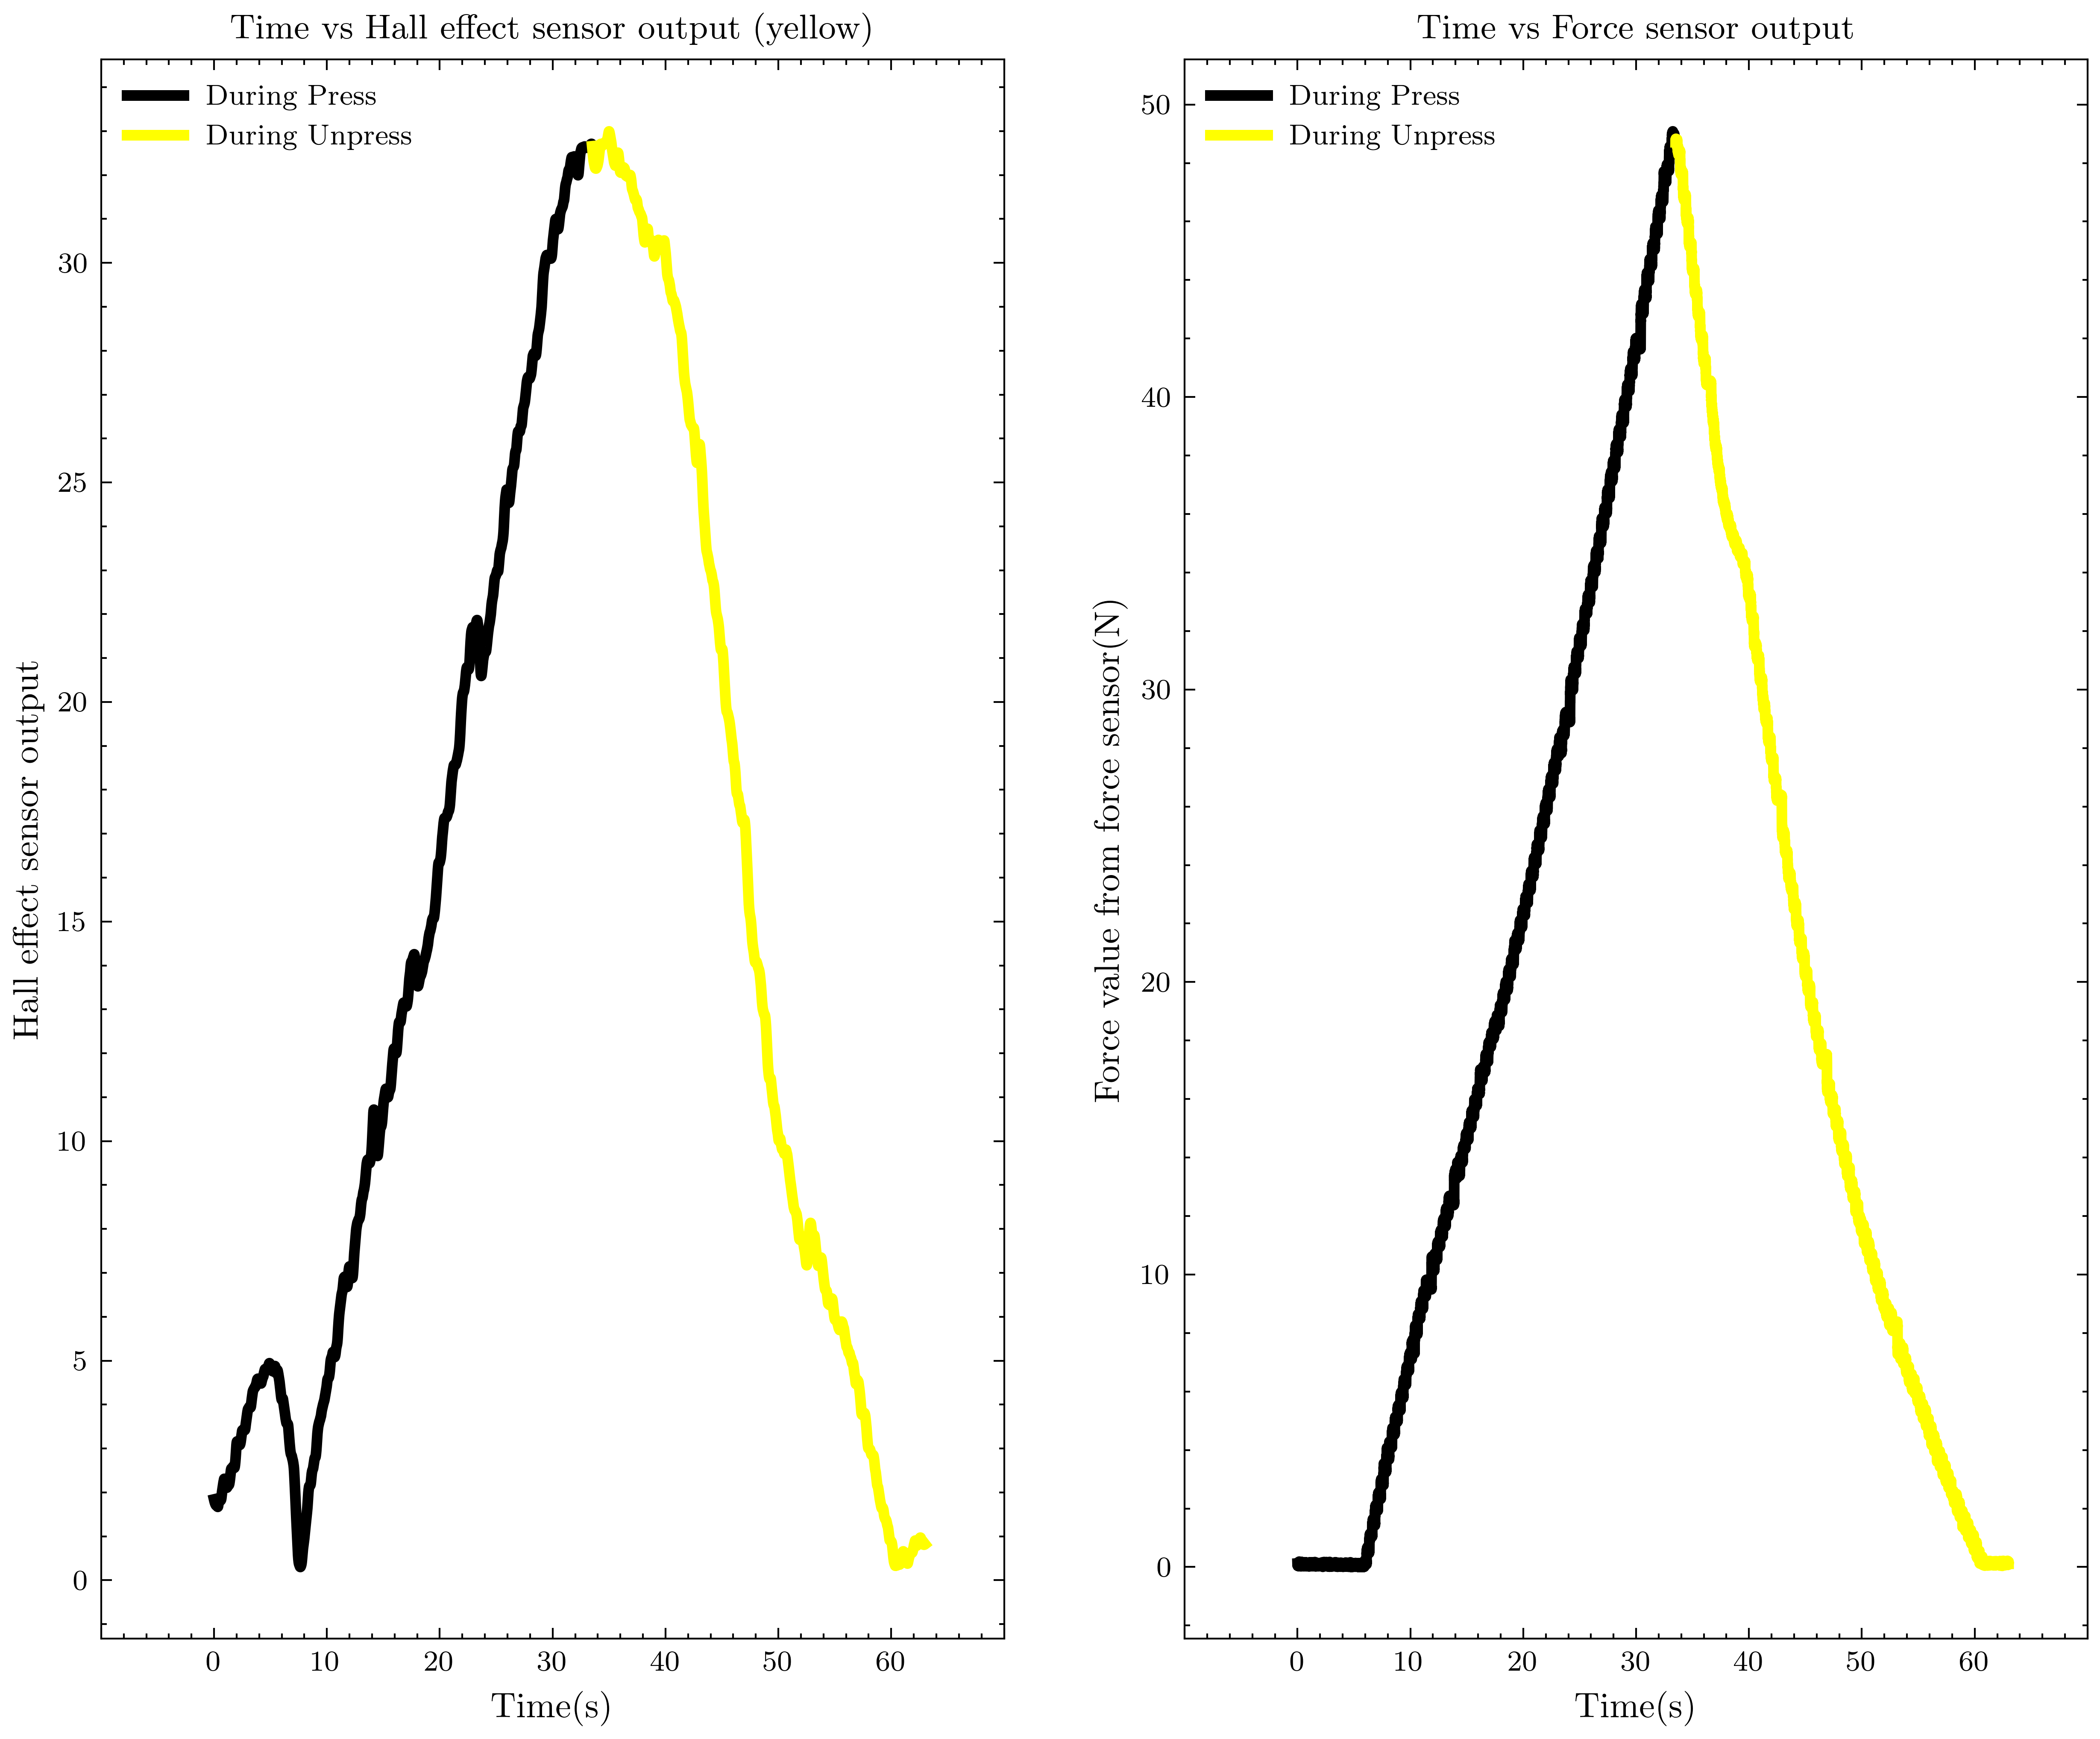

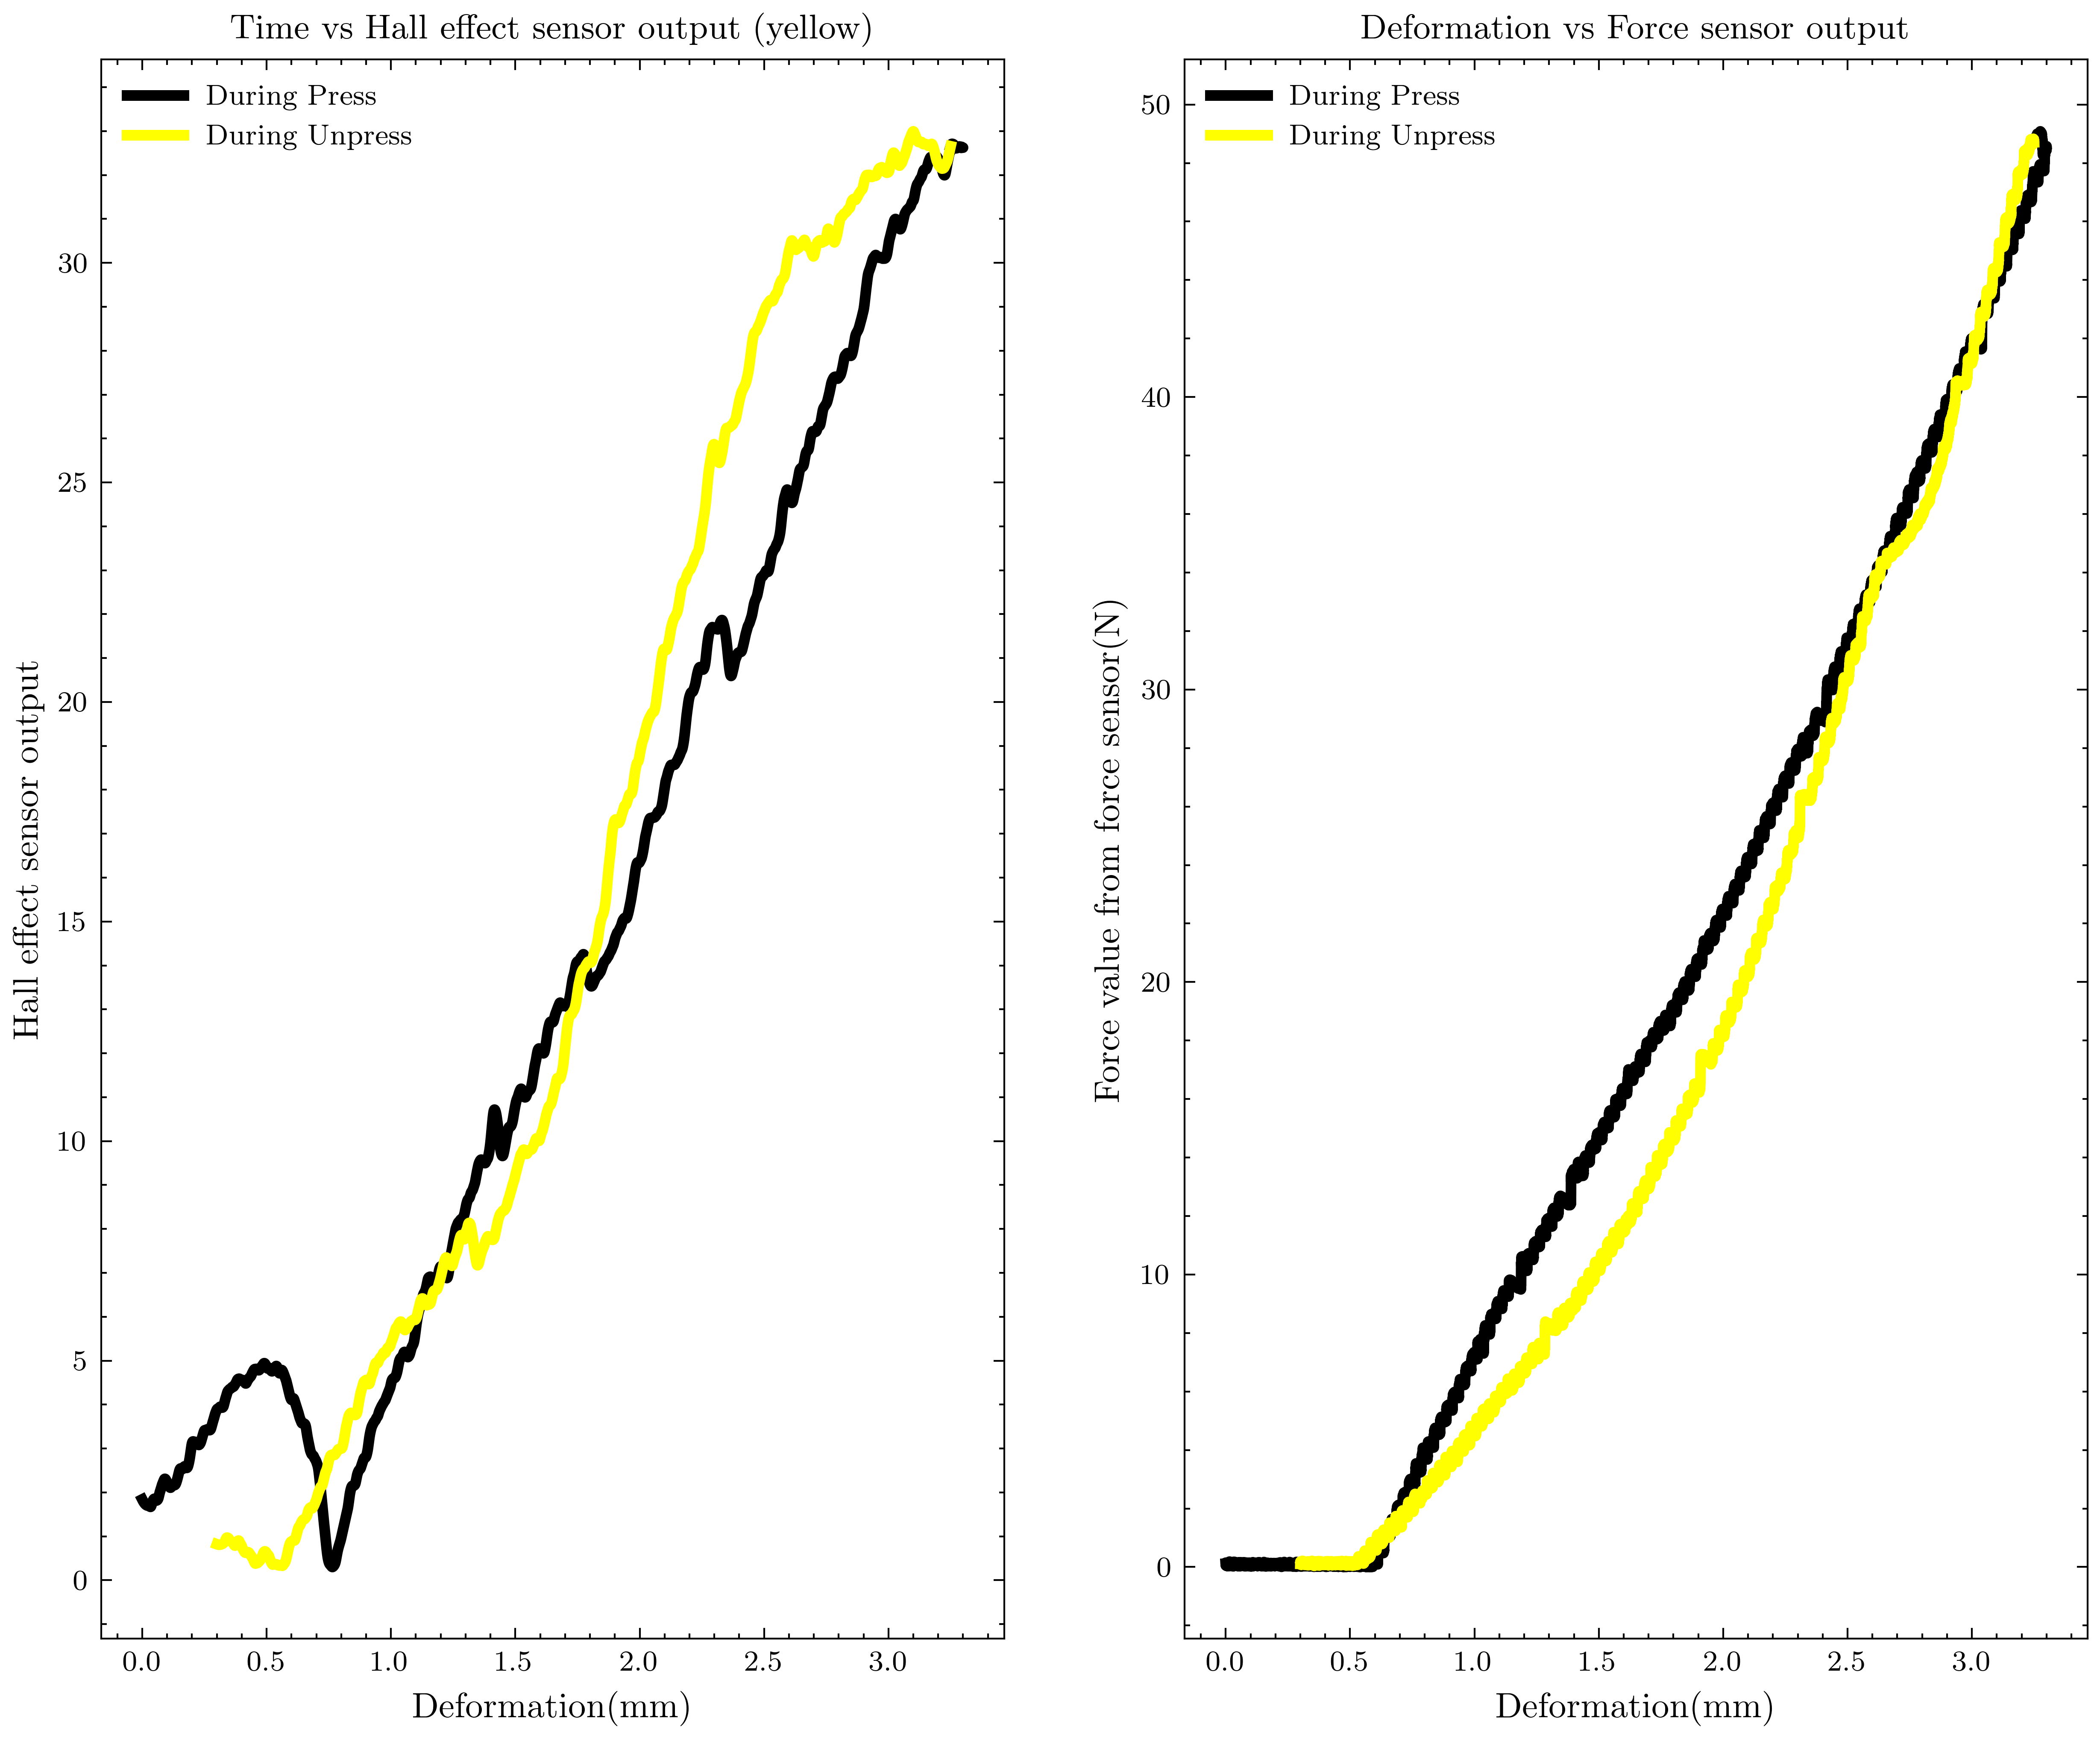

In [53]:
new_plots(yellow_df,polyY,'yellow')

50258


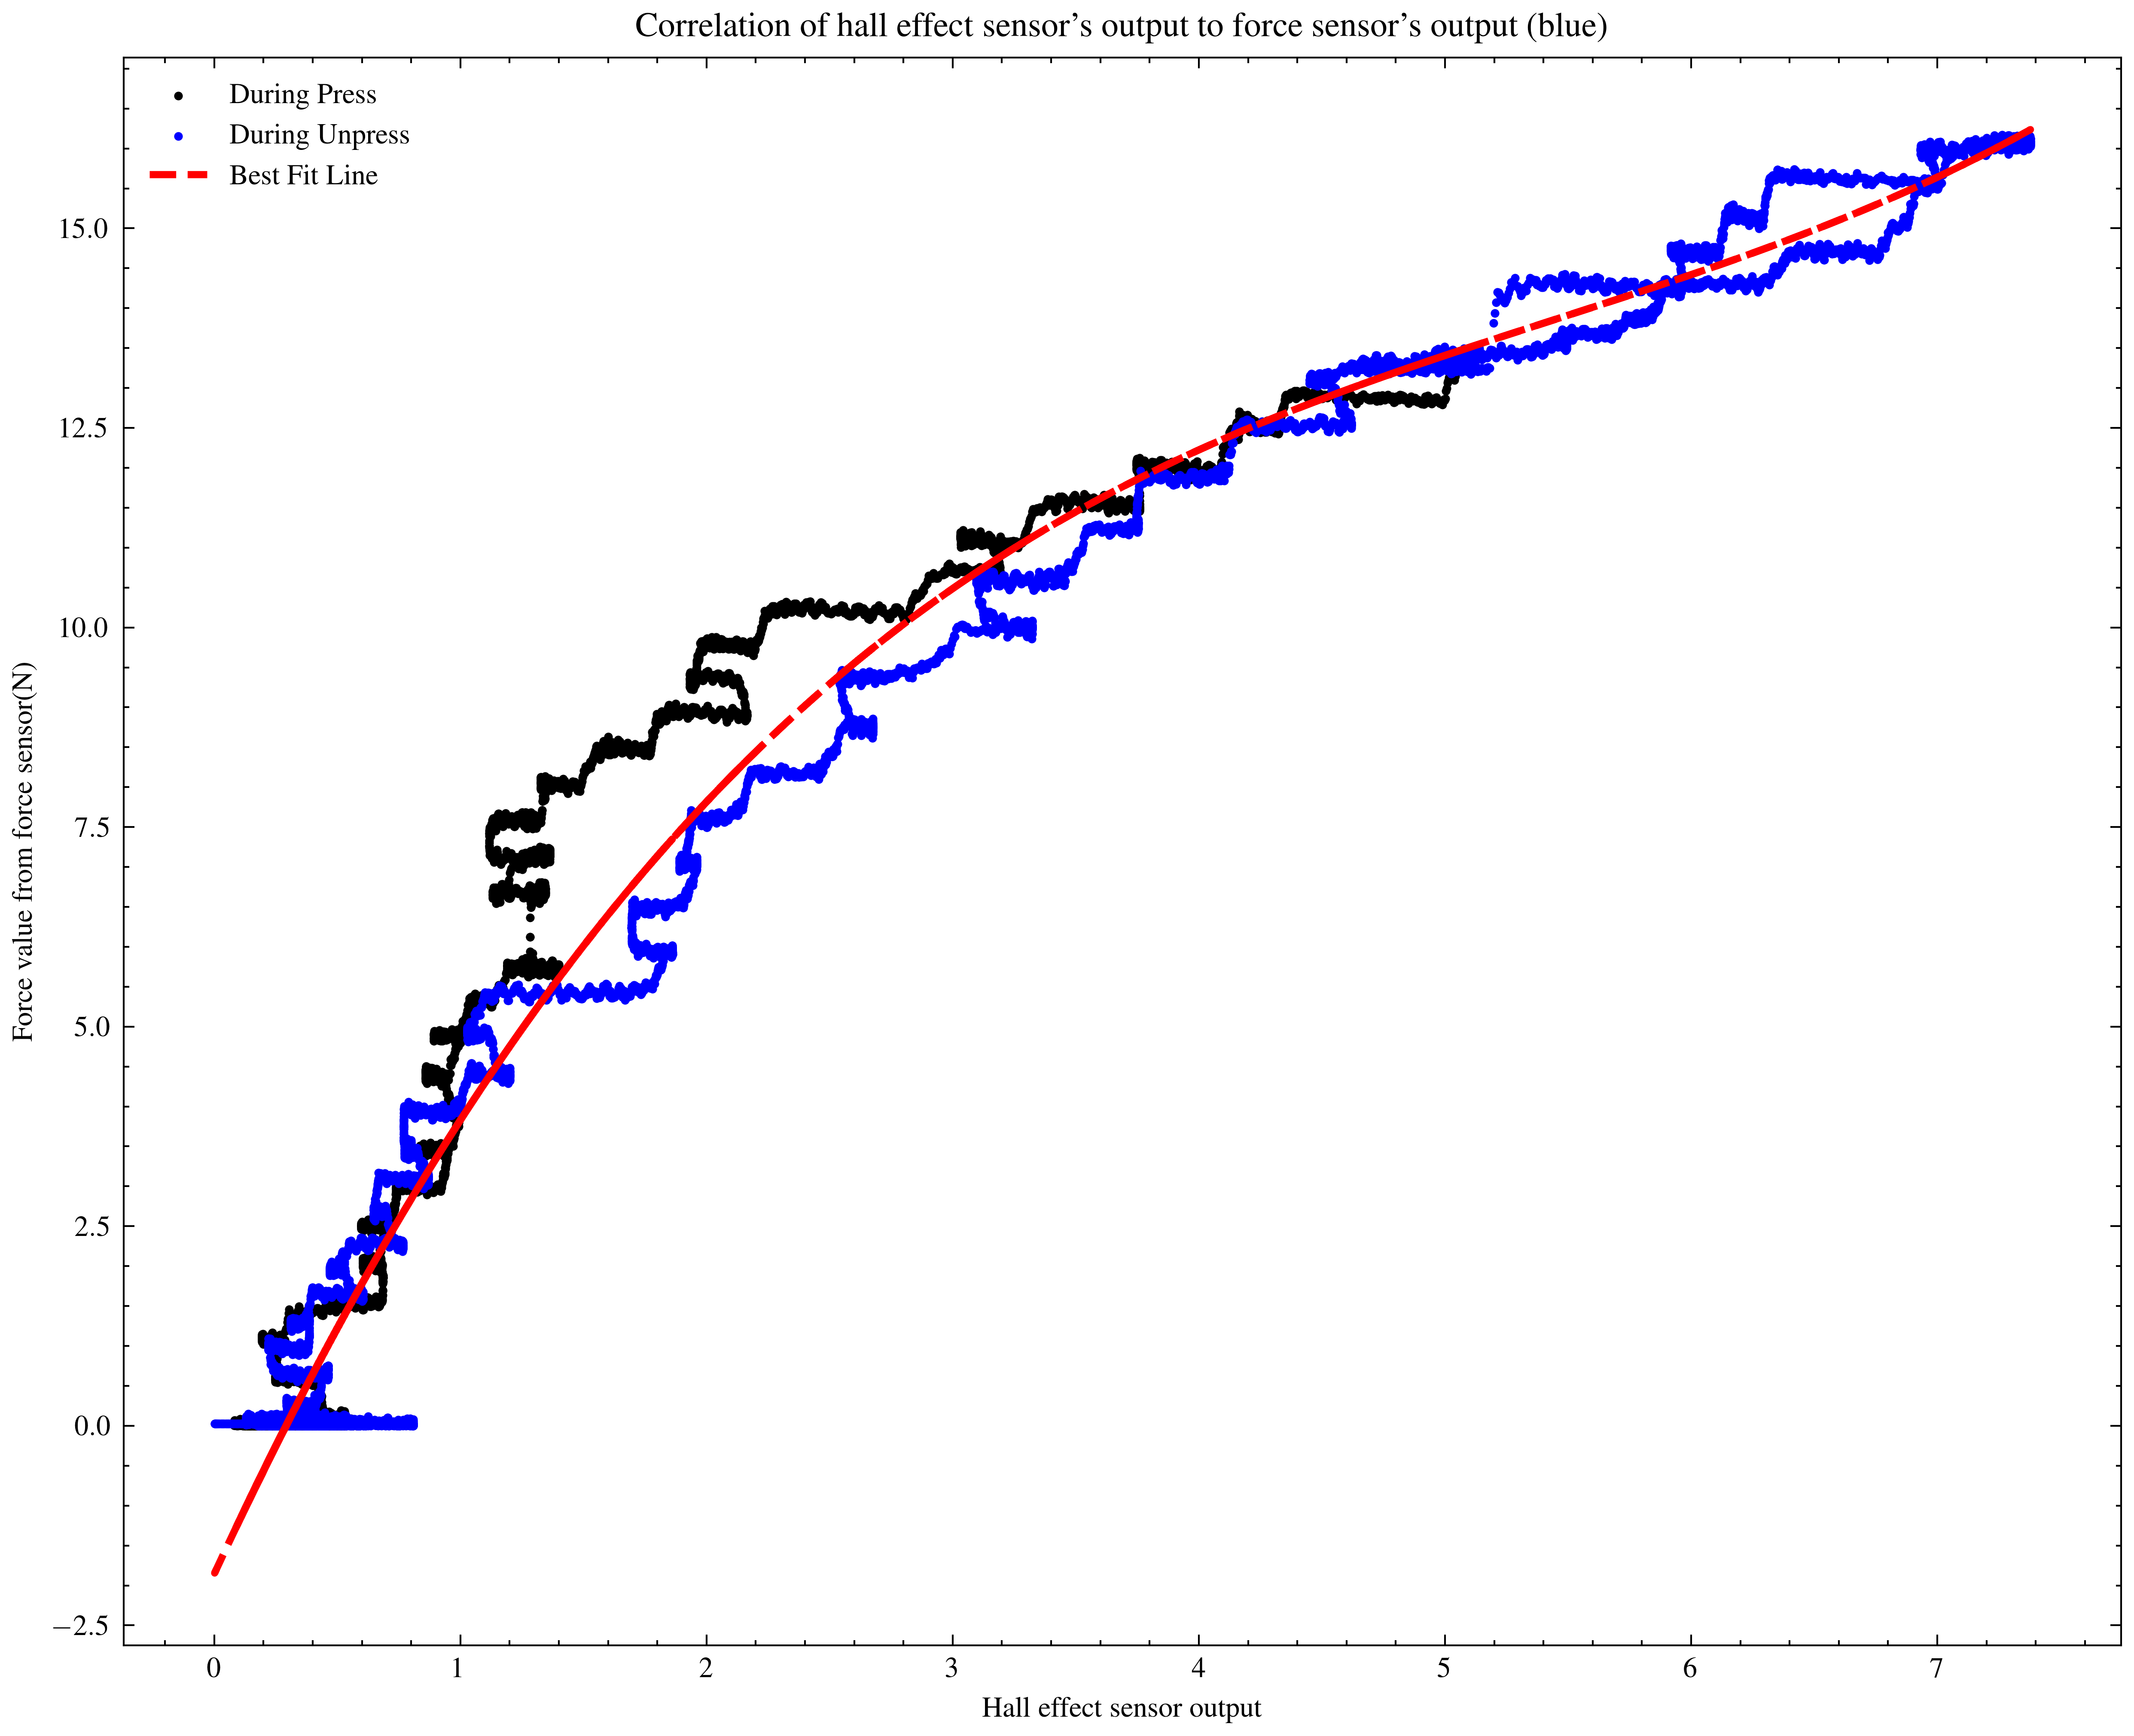

/tmp/ipykernel_22694/2833709416.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(ticks)


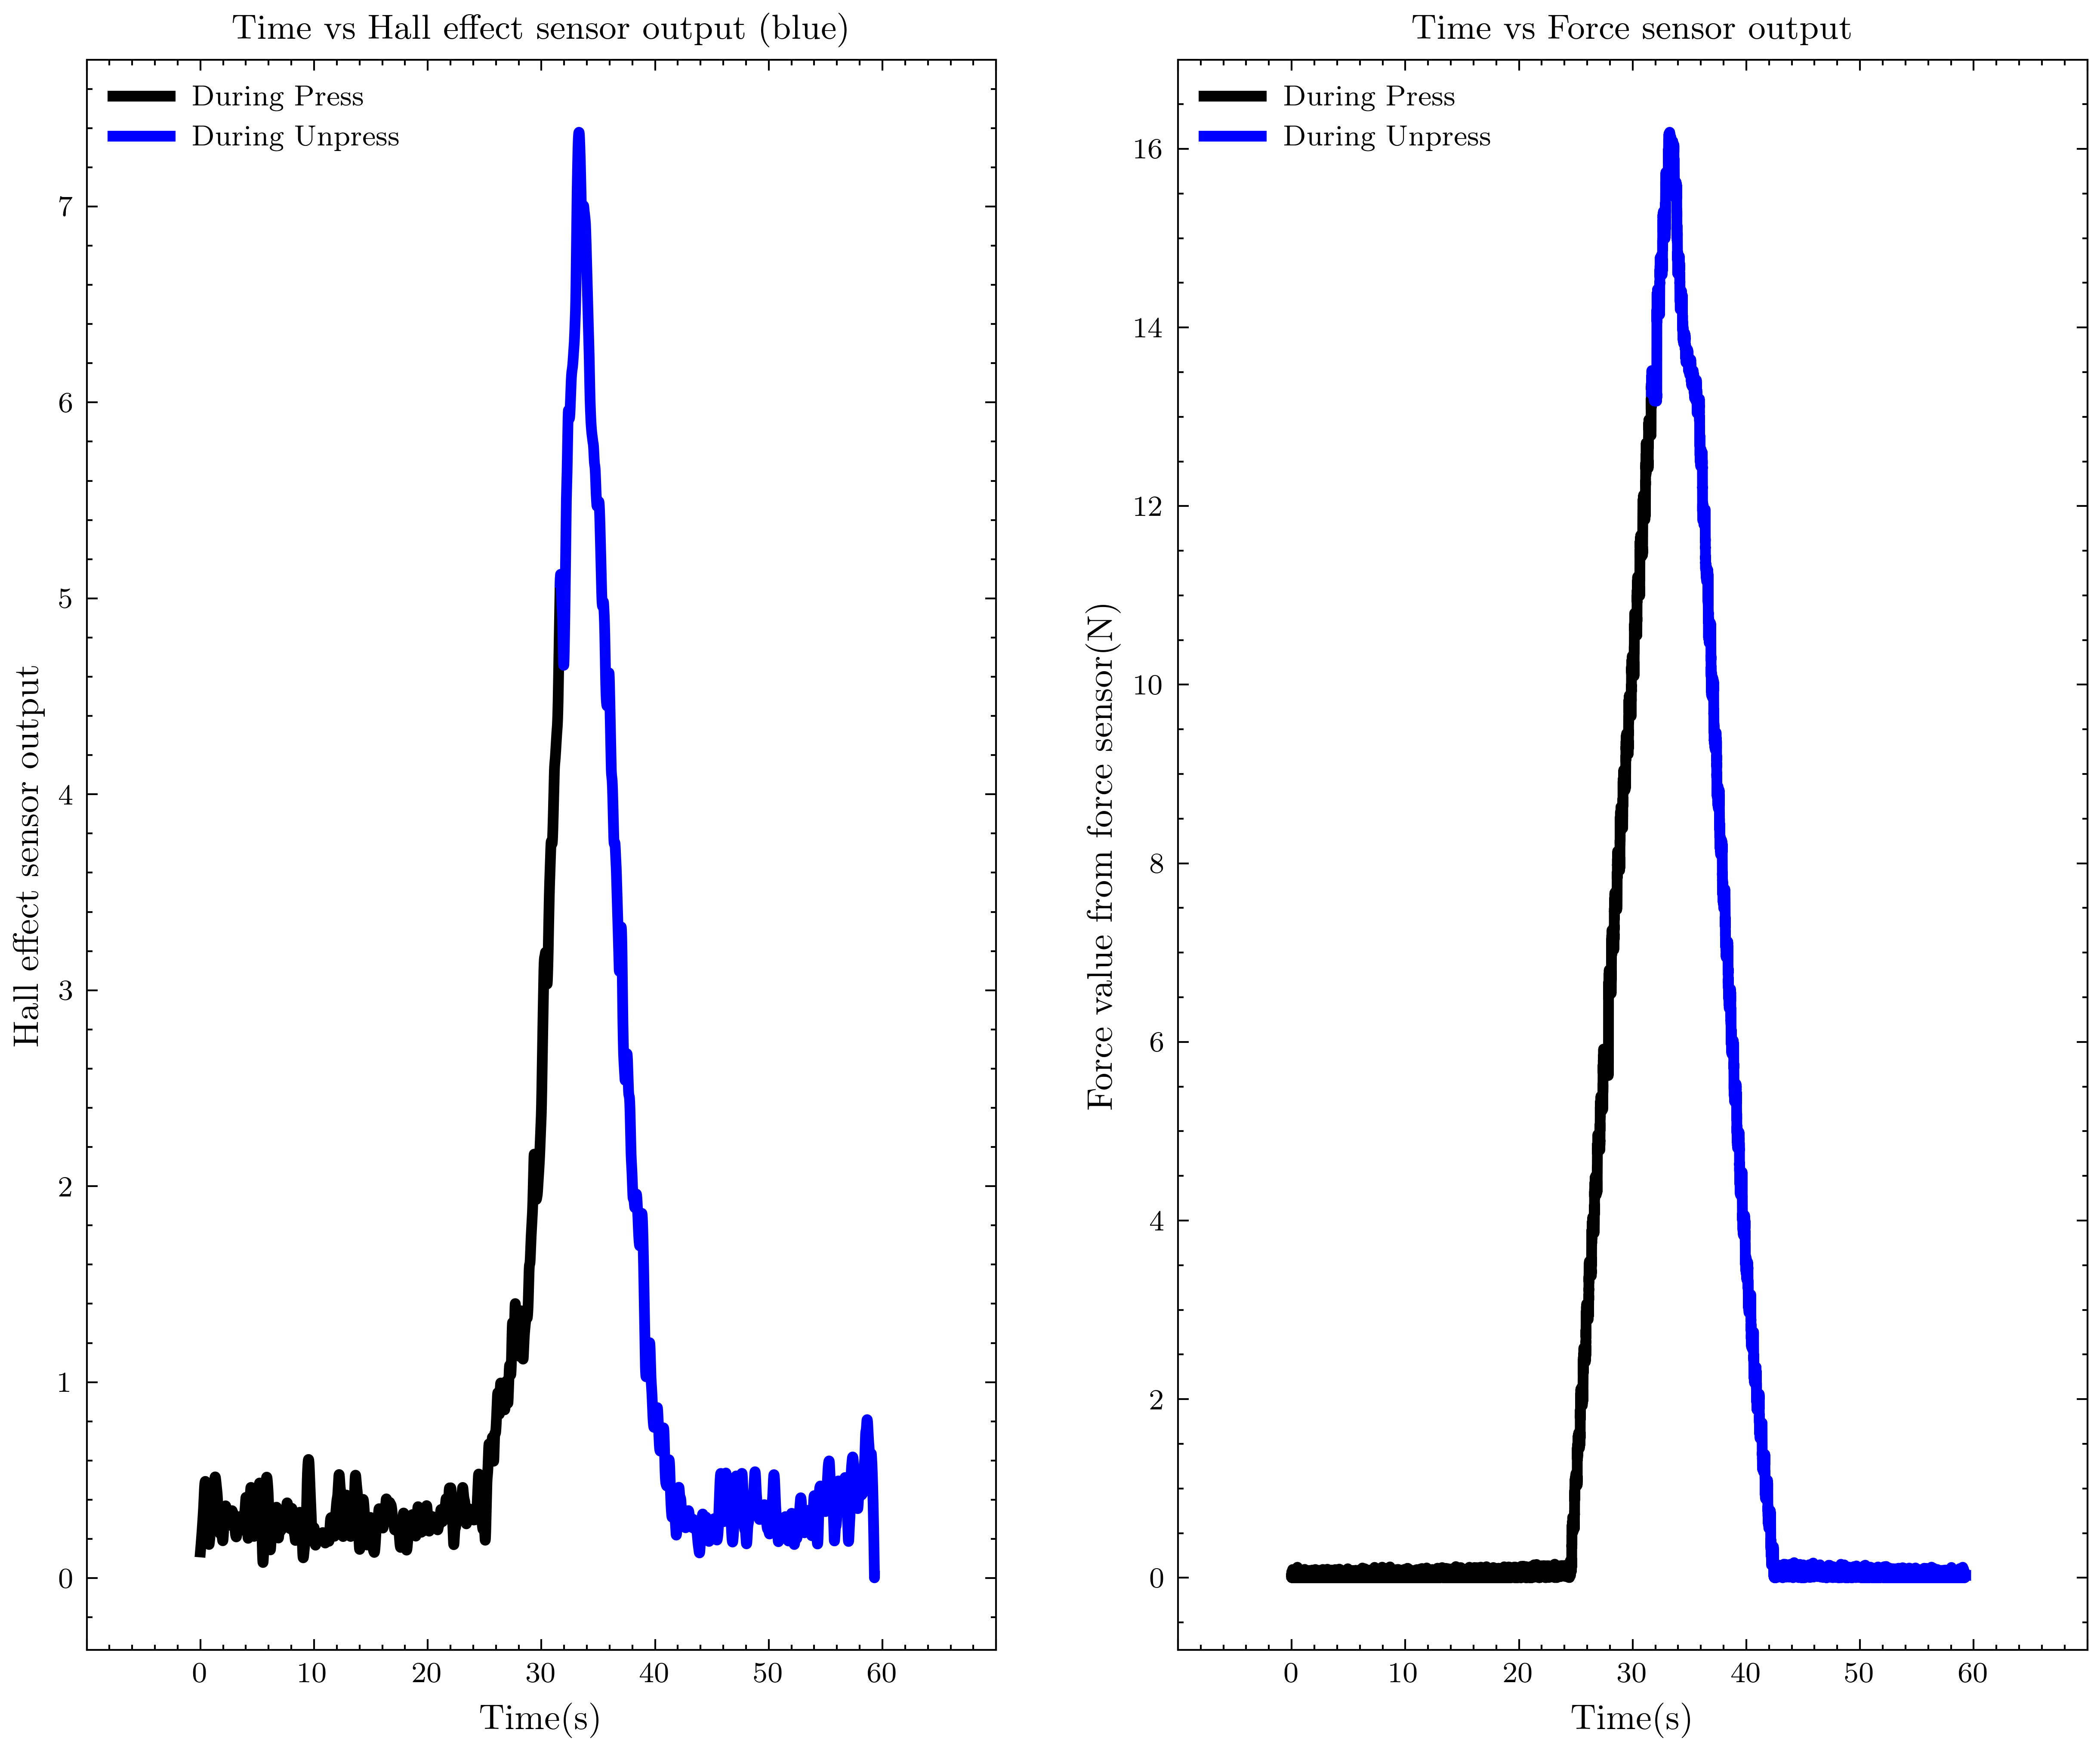

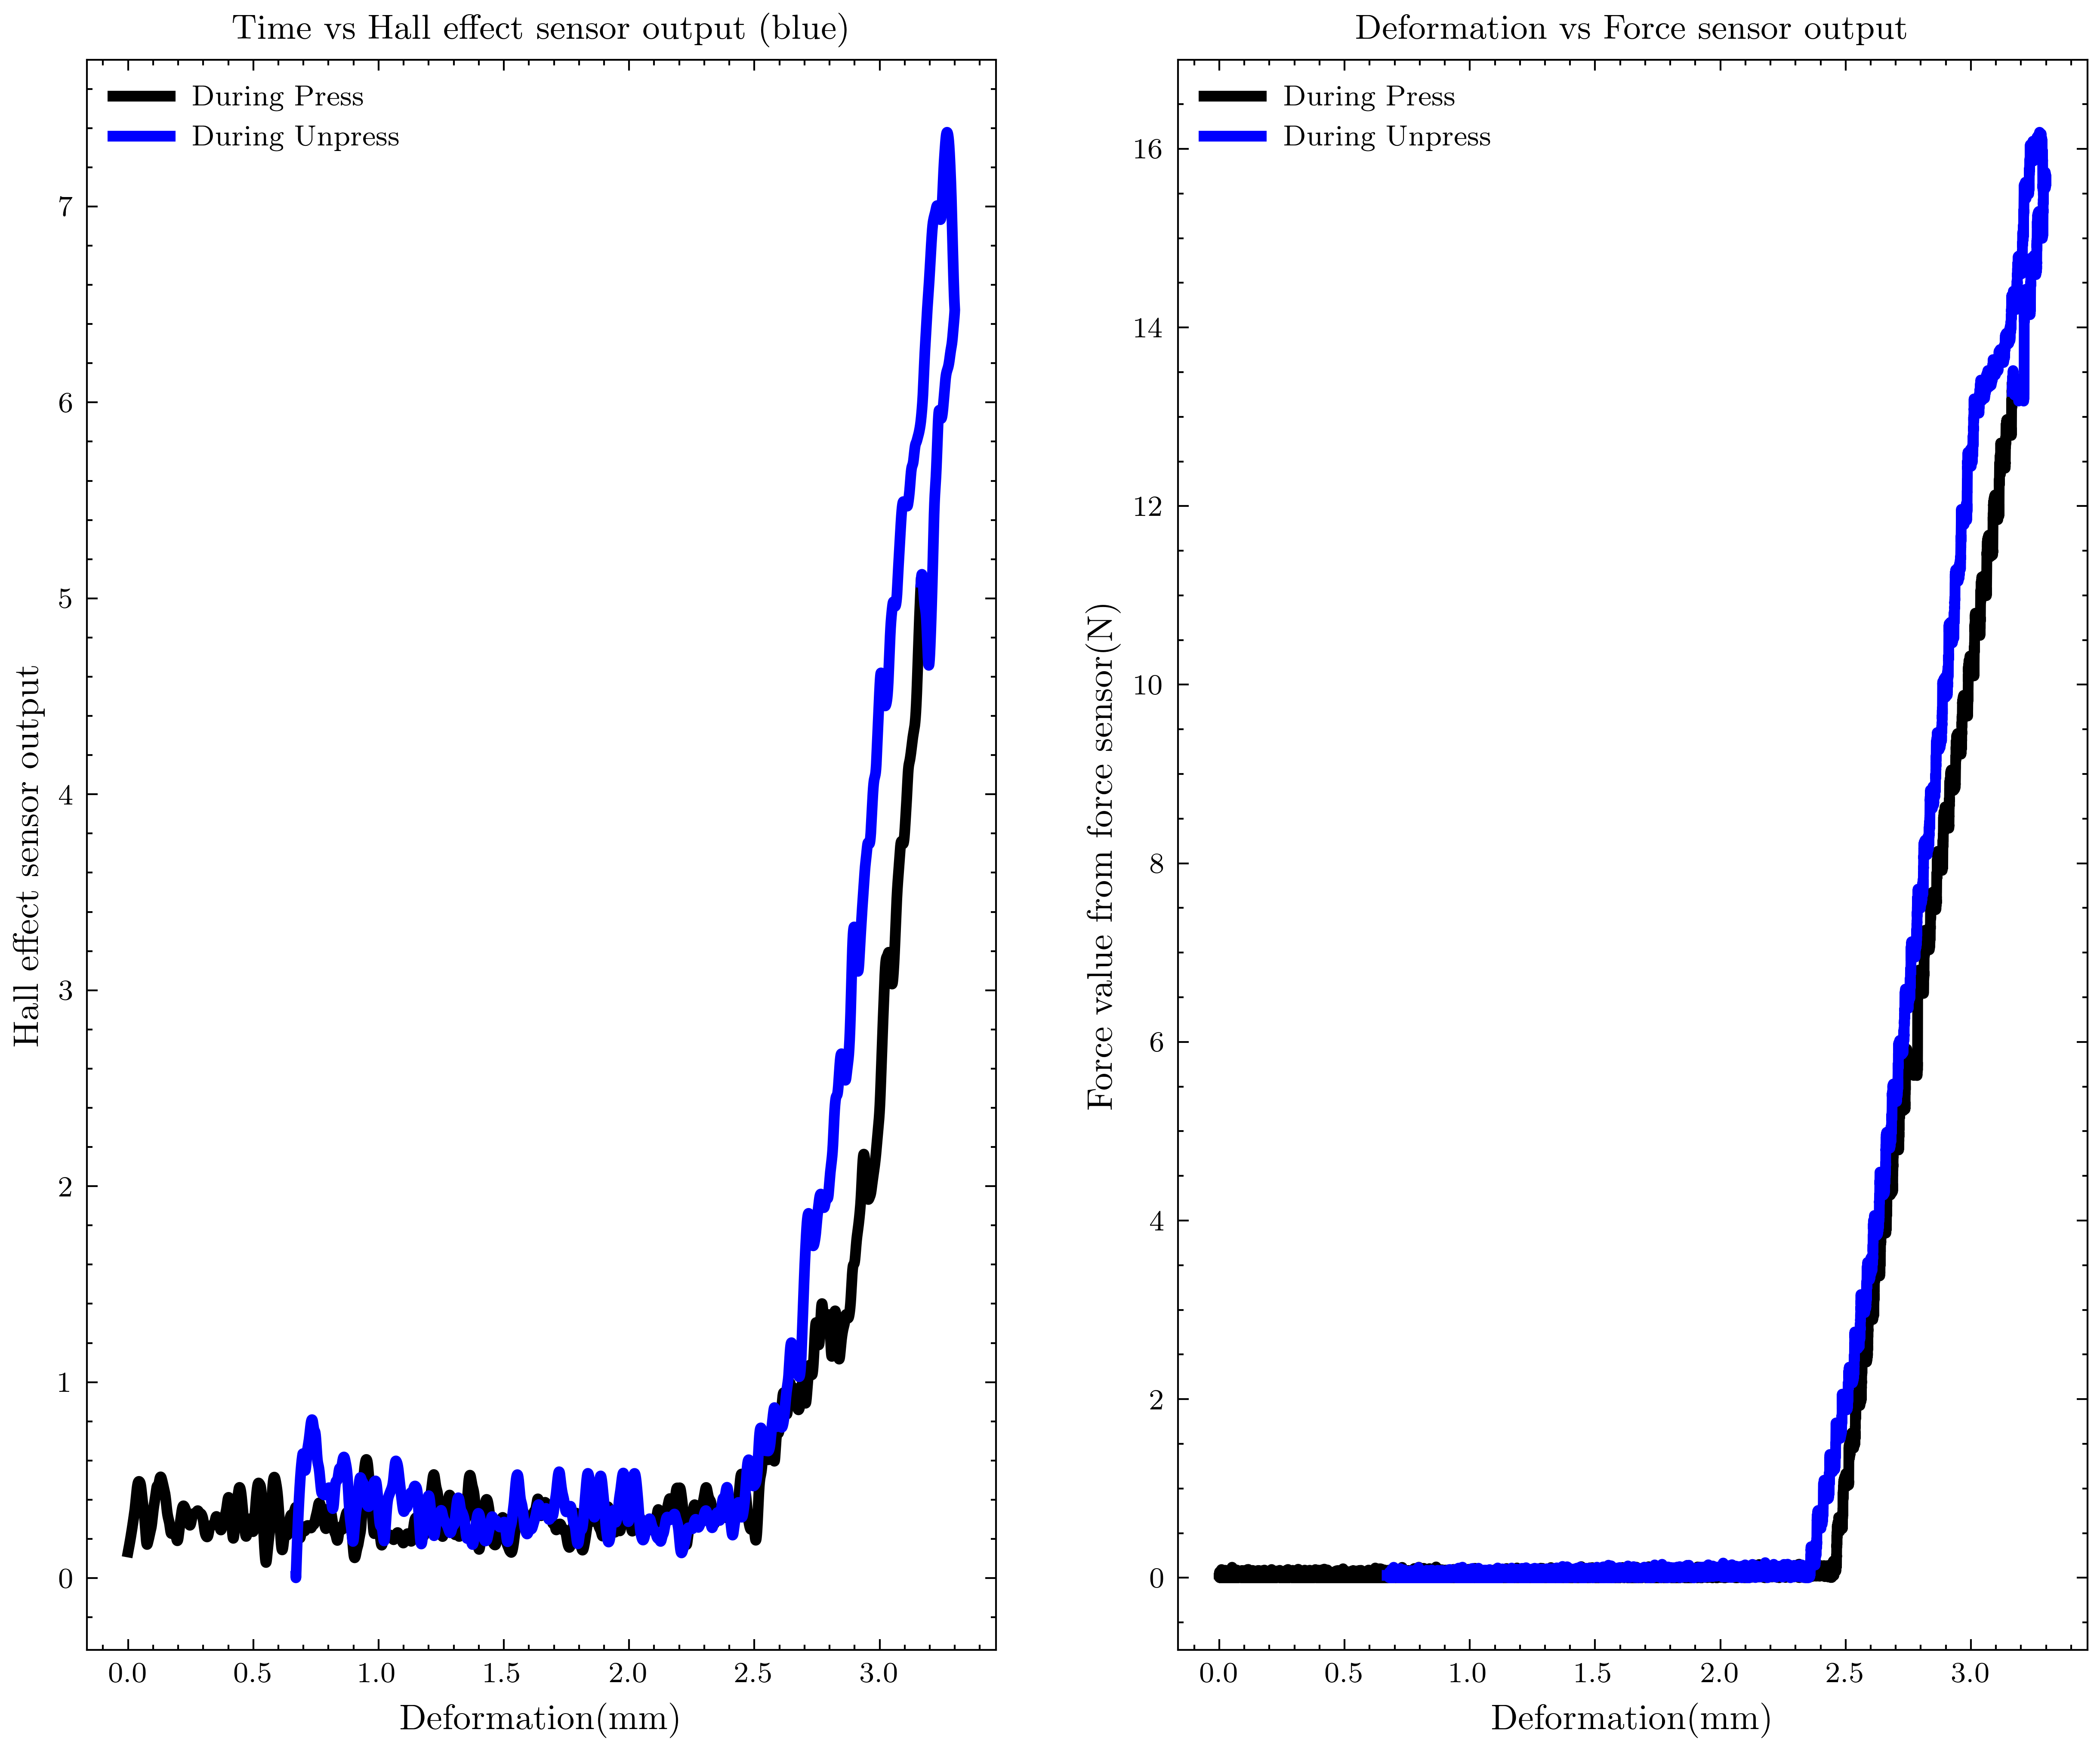

In [54]:
new_plots(blue_df,polyB,'blue')